In [18]:
from __future__ import print_function
import os
import sys
import cv2  # OpenCV用于图像读取和旋转
import numpy as np
from keras.models import load_model

sys.path.append('..')
from utils import load_and_pair_data, manual_train_test_split, angle_error_regression

In [ ]:
model_location = os.path.join('..', 'models', 'rotnet_carcass_regression.hdf5')
model = load_model(model_location, custom_objects={'angle_error_regression': angle_error_regression})
model.summary()

# 设置路径，加载图片数据
image_dir = r"C:\Users\xuyan\RotNet\data\RotationAngle\DATASET\RAW\images"
csv_path = r"C:\Users\xuyan\RotNet\data\RotationAngle\DATASET\dataset_image_rotation_data.csv"

images, angles,origin_images = load_and_pair_data(image_dir, csv_path,target_size=(96, 128))

X_train, X_test, y_train, y_test = manual_train_test_split(images, angles, test_size=0.2)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 96, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 94, 128)      1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 94, 128)      512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 47, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 47, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 45, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 45, 256)       1024  

In [20]:
batch_size = 8
out = model.evaluate(
    X_test,y_test,
    steps=len(y_test) / batch_size
)

print('Test loss:', out)

83/83 [==============================] - 1s 8ms/step - loss: 20.8836
Test loss: 20.883596420288086


In [21]:
y_pred = model.predict(X_test)
# 打印真实标签和预测标签
print("真实标签 (y_true):")
print(y_test)

真实标签 (y_true):
[  -4.    38.   -30.    11.     1.   -44.     1.     3.    -5.3   10.
    0.5    3.    -8.     4.4    0.3    5.     1.   -34.   -54.   -45.
  -42.     9.    -1.9  -11.   -39.   -40.    -4.     5.    -2.     6.
   -3.   -50.   -25.    -1.    -1.   -11.     9.     8.    -5.   -48.
    3.     4.     7.    -1.   -53.     4.    27.     4.   -18.   -27.7
  -28.     3.   -45.     6.     9.   -14.    -6.   -11.    -4.     1.
   11.   -17.9    3.     1.   -42.     1.     0.     8.   -16.     8.
   12.    41.     0.    -5.   -47.    37.  -108.   -62.    -9.     5.
    1.     1.     4.    -4.6   -5.     7.   -31.     7.    12.    -4.
    1.    -1.   -39.   -30.     5.     3.3    0.6  -41.   -43.   -27.
  -33.    10.    -4.     2.     7.    -6.     9.   -10.     2.     5.
  -37.    -6.    -7.1  -48.   -44.   -34.   -12.   -50.     3.   -63.
    4.    -2.     8.   -19.   -42.   -40.    -8.     9.     7.    13.
    9.     0.     5.2  -40.5  -33.    15.     3.    -5.    -3.   -61.
    

In [22]:
print("预测标签 (y_pred):")
for value in y_pred.flatten():
    print(f"{value:.1f}")

预测标签 (y_pred):
-12.1
15.6
-22.4
8.7
-34.9
58.0
1.7
0.3
34.1
-26.4
1.4
11.1
9.3
1.5
-9.5
-1.4
0.8
4.8
13.3
29.4
-7.4
1.3
-3.4
6.9
34.3
16.3
3.8
-0.8
-1.6
2.3
-27.3
26.6
26.1
14.9
34.7
2.9
1.1
7.2
4.4
7.6
-7.2
1.2
11.8
3.1
46.8
19.7
-5.8
-6.2
-18.4
10.0
10.3
-3.3
2.4
11.0
-4.1
-29.1
4.5
3.5
-8.4
11.1
-9.1
-4.1
12.2
-1.4
14.4
-6.8
13.6
-1.1
-17.3
3.9
7.7
15.0
31.8
13.0
4.5
30.7
-3.6
41.0
-26.8
-23.1
3.9
9.1
2.1
20.2
-7.4
-1.9
5.1
6.3
6.5
7.5
-0.3
33.8
-19.3
49.2
4.6
5.2
2.8
3.9
60.2
71.2
37.7
-9.8
38.6
0.1
8.1
-19.9
-31.0
-0.7
4.2
6.0
32.1
-1.1
3.3
-13.4
8.0
25.0
-3.0
-39.4
-14.7
33.7
4.3
10.9
40.5
-29.3
31.2
12.0
4.2
-0.1
3.3
2.7
14.3
6.9
4.7
11.6
-2.5
9.8
5.4
5.2
-8.0
51.2
36.2
6.0
21.8
-21.8
-3.5
-5.8
0.4
4.2
5.3
-40.5
-15.1
10.3
7.2
6.4
5.7
-18.2
-5.1
-1.1
-1.3
-5.1
3.7
-11.3
4.3
2.6
59.9
1.4
24.8
-25.5
0.9
3.2
5.3
-3.5
29.8
-0.3
-3.6
-0.9
-1.3
1.1
-12.5
-10.2
-15.5
-21.5
-2.5
33.3
4.5
6.6
14.7
3.4
48.7
41.7
12.1
-0.6
3.0
5.1
-0.7
3.0
-9.2
7.2
10.8
-33.8
-9.2
9.8
2.3
-8.1
-13.6
-1.5
1

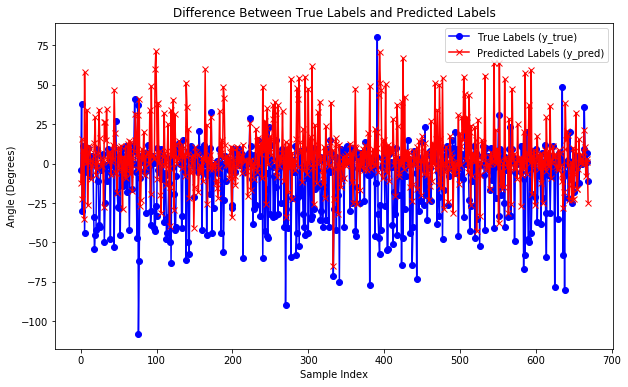

In [23]:
import matplotlib.pyplot as plt

# Predict labels
y_pred = model.predict(X_test)

# Plot the difference between true labels and predicted labels using line plots
plt.figure(figsize=(10, 6))

# Plot the true labels as a line
plt.plot(y_test, label="True Labels (y_true)", color='b', linestyle='-', marker='o')

# Plot the predicted labels as a line
plt.plot(y_pred, label="Predicted Labels (y_pred)", color='r', linestyle='-', marker='x')

# Add title and labels to the plot
plt.title("Difference Between True Labels and Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Angle (Degrees)")
plt.legend()

# Display the plot
plt.show()



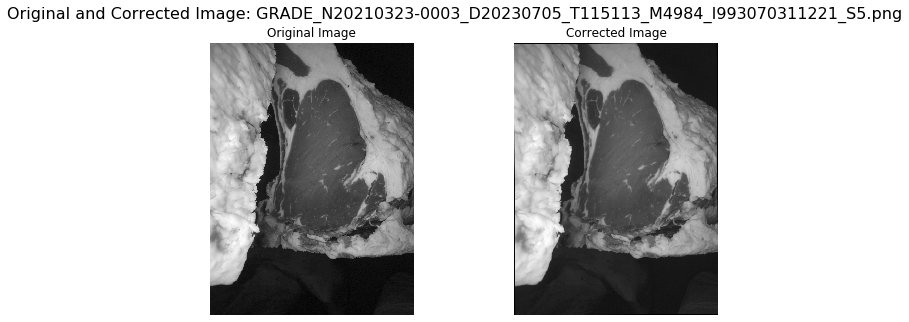

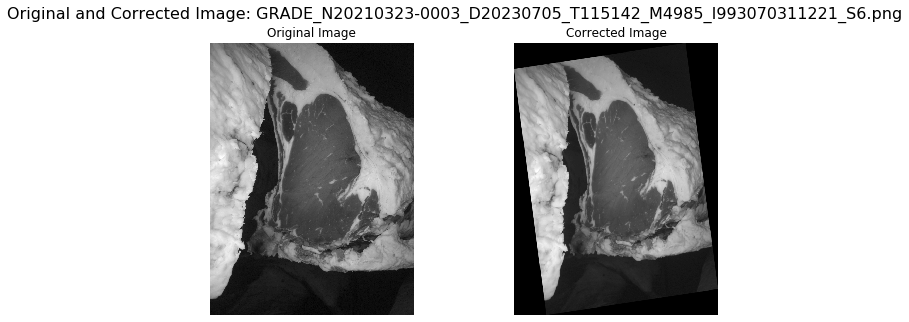

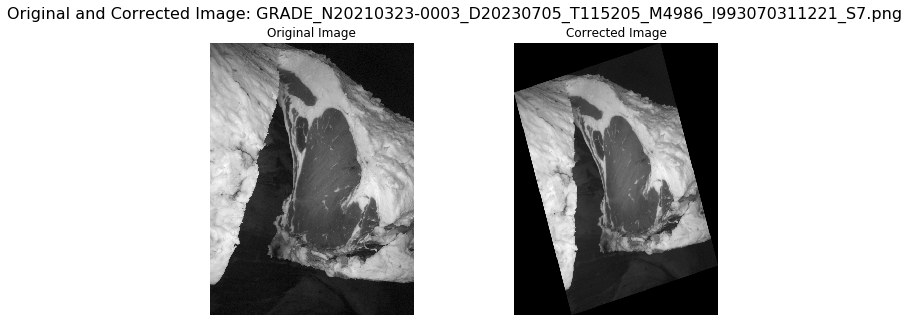

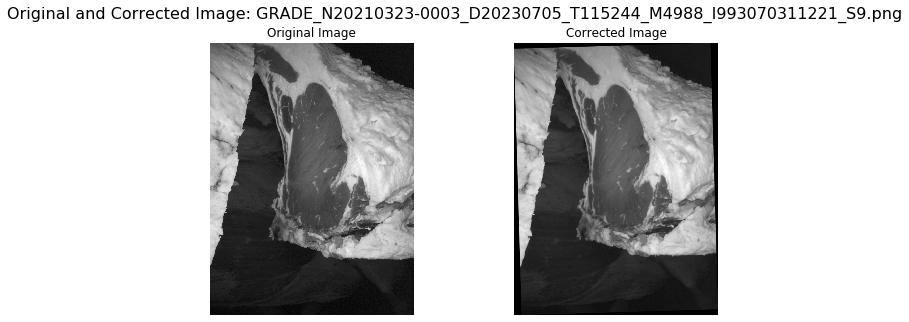

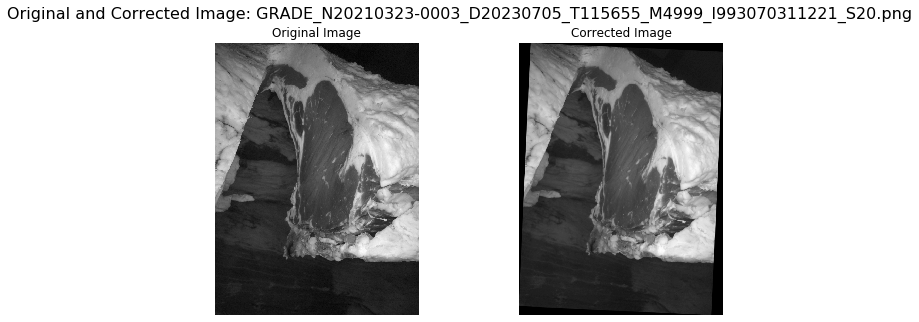

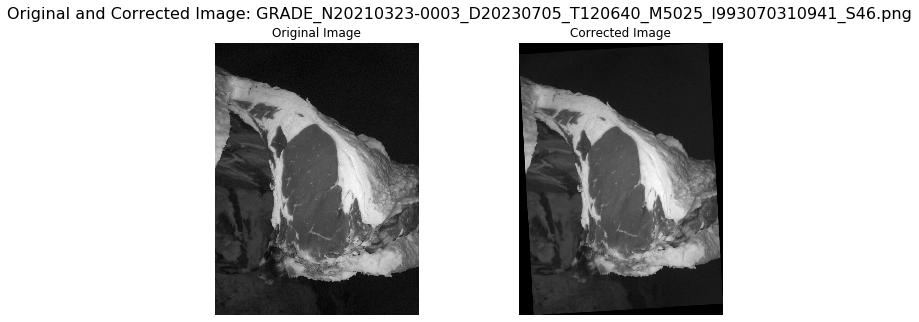

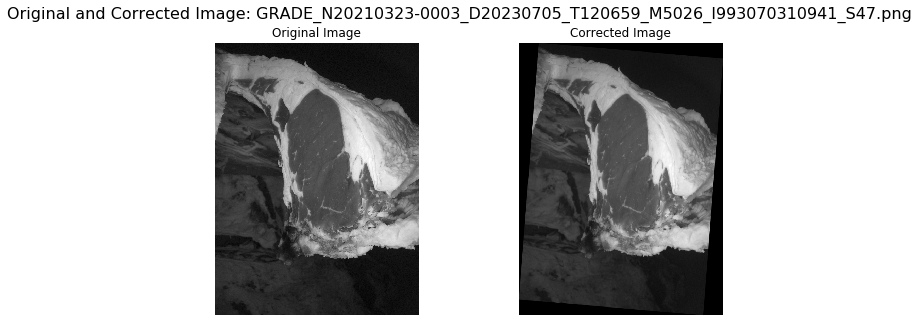

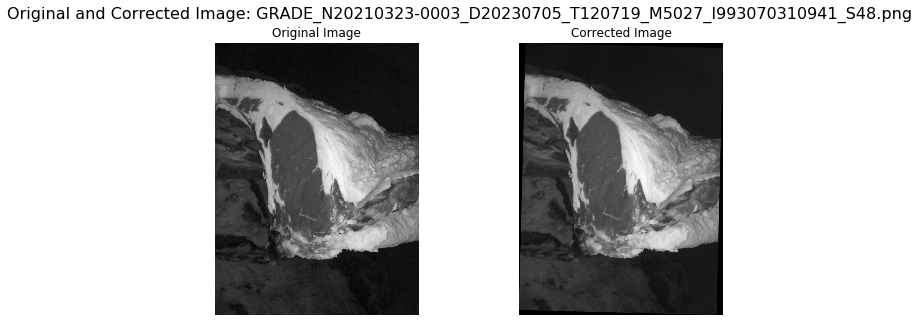

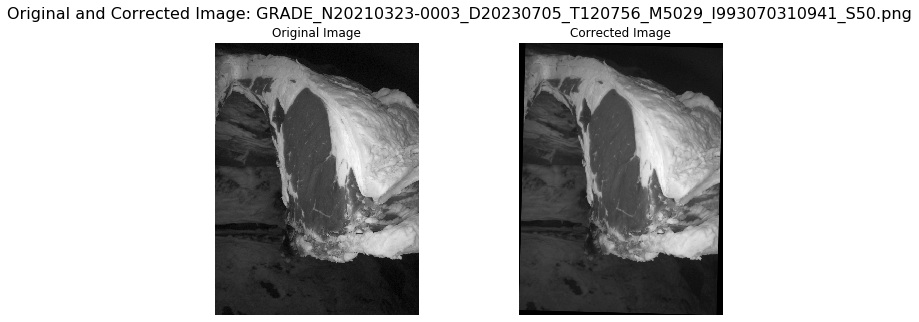

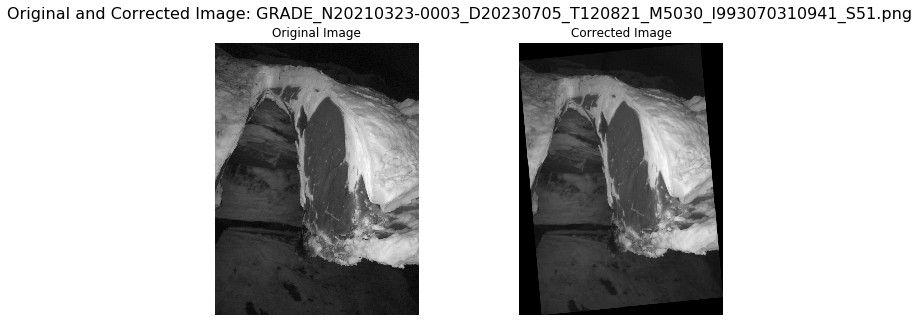

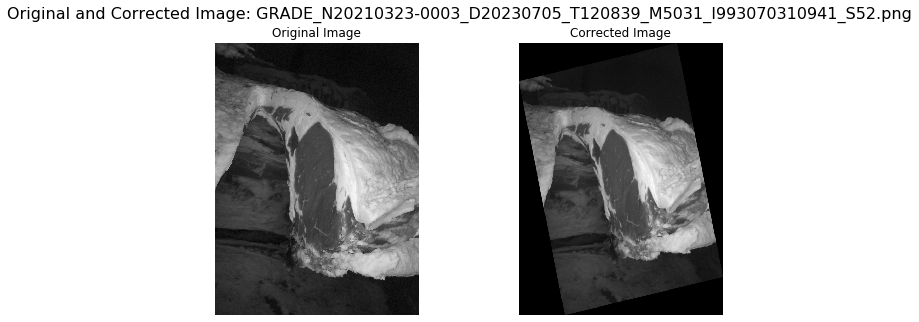

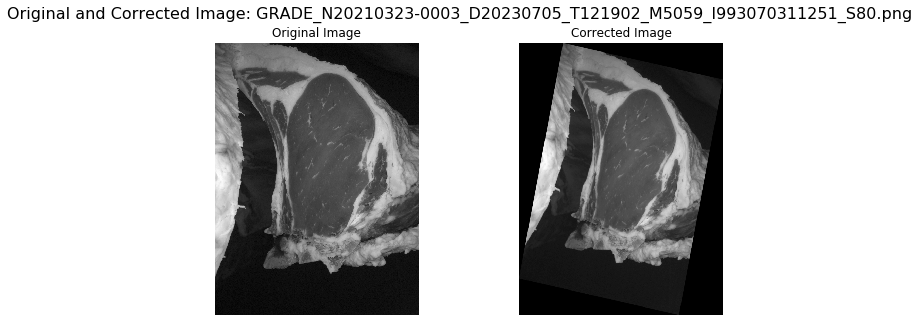

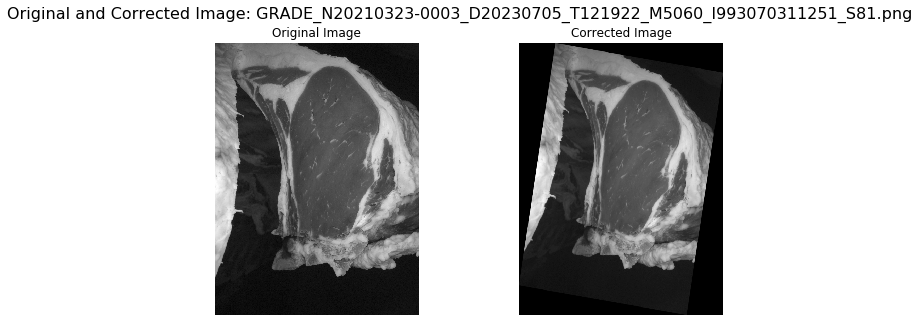

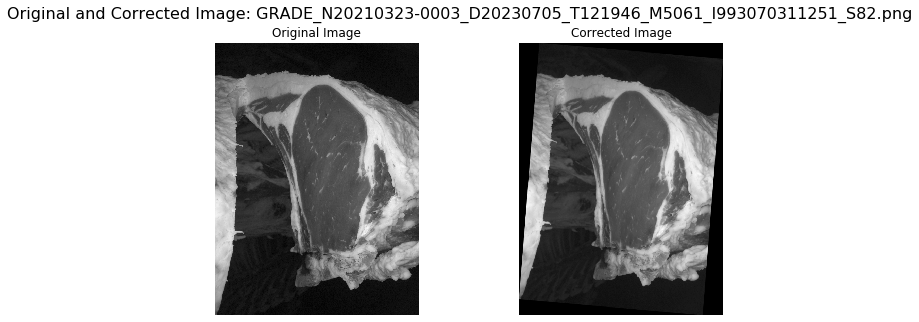

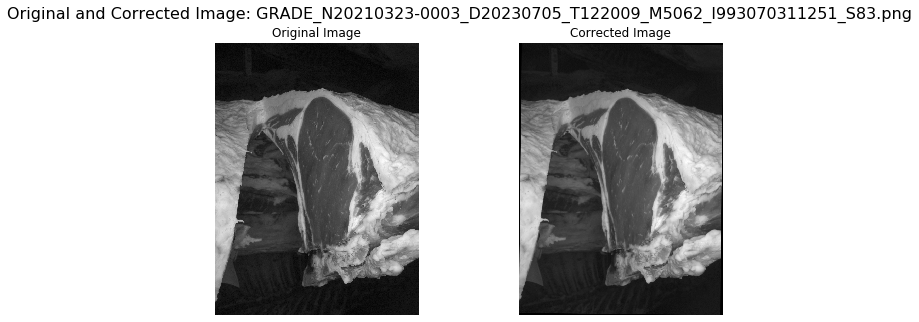

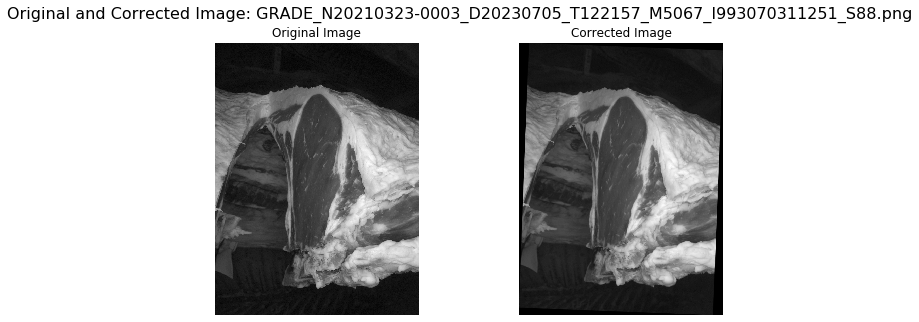

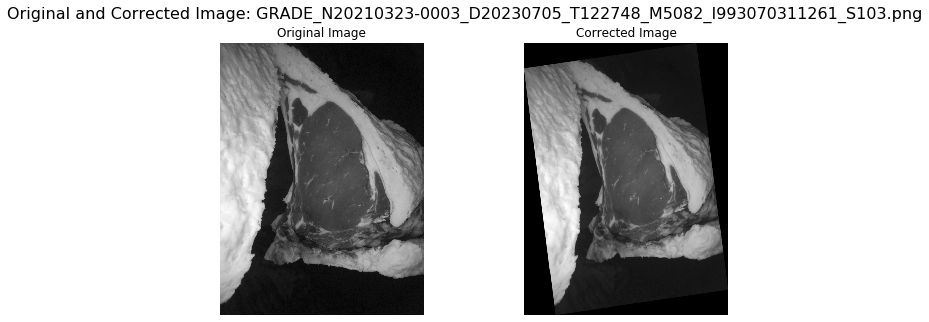

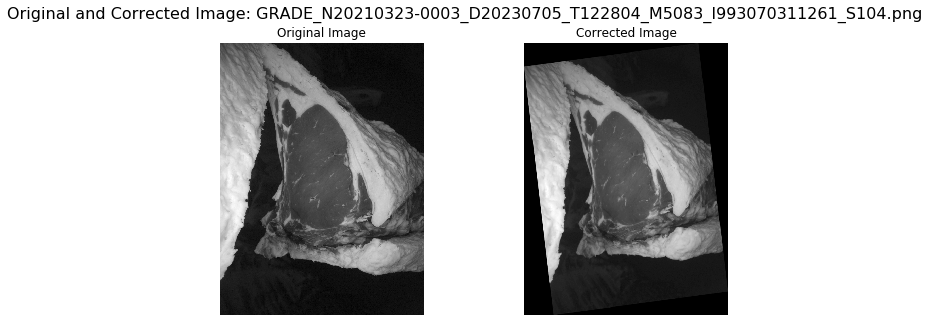

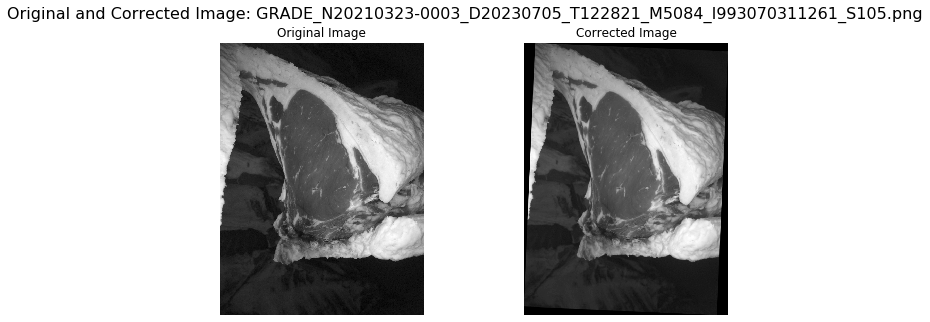

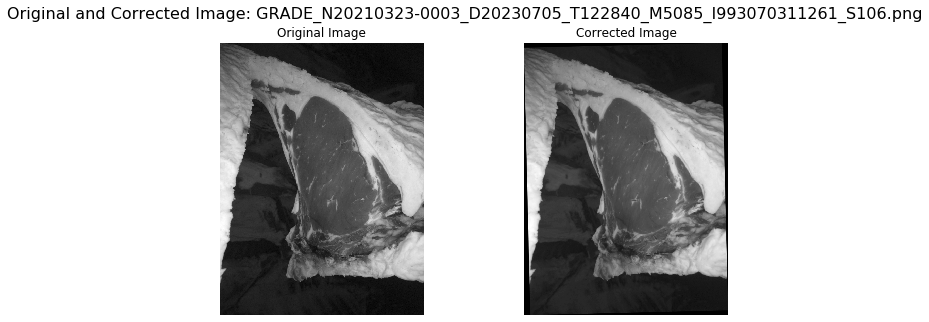

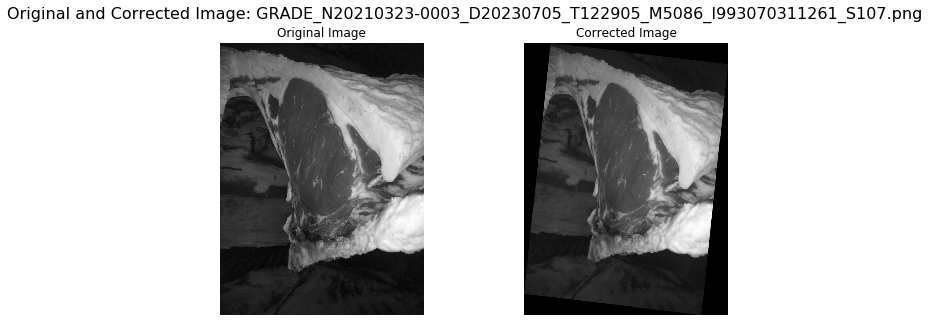

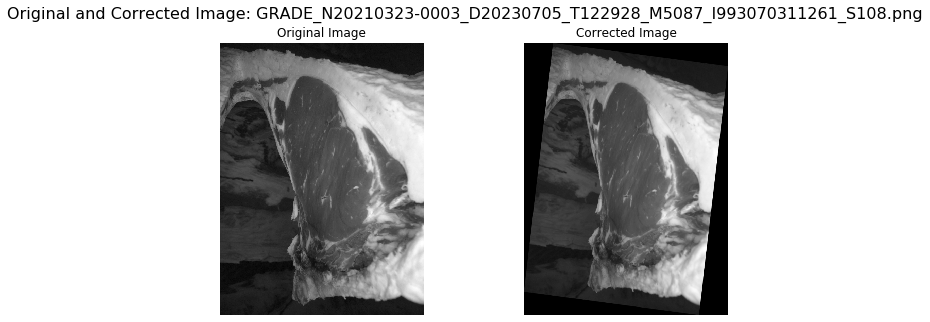

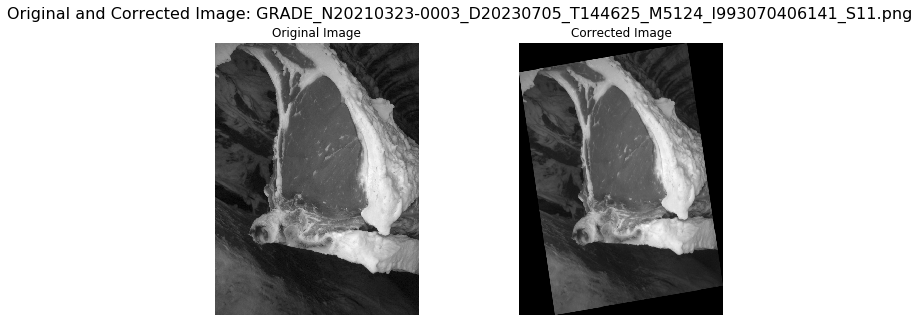

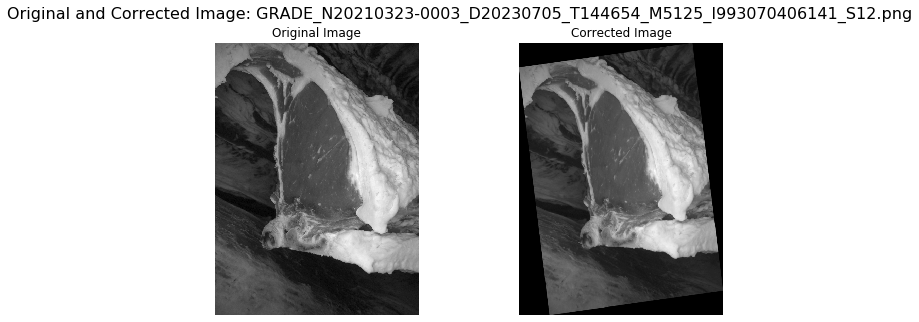

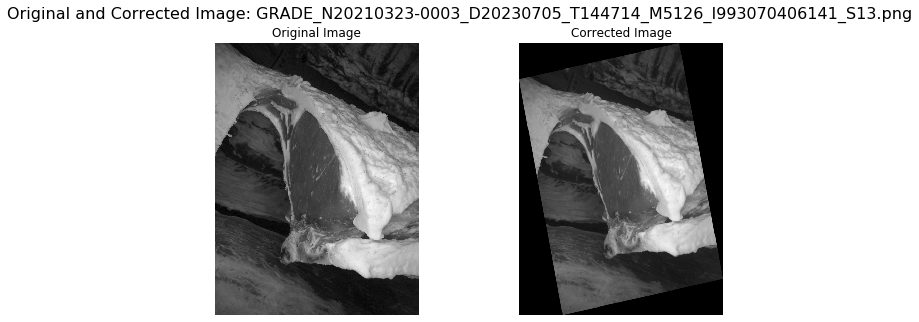

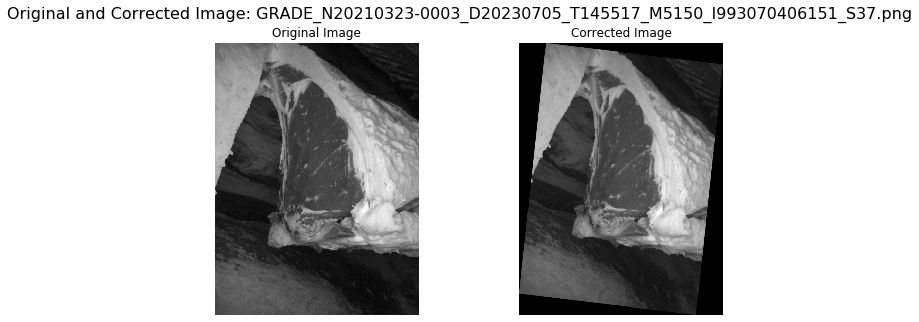

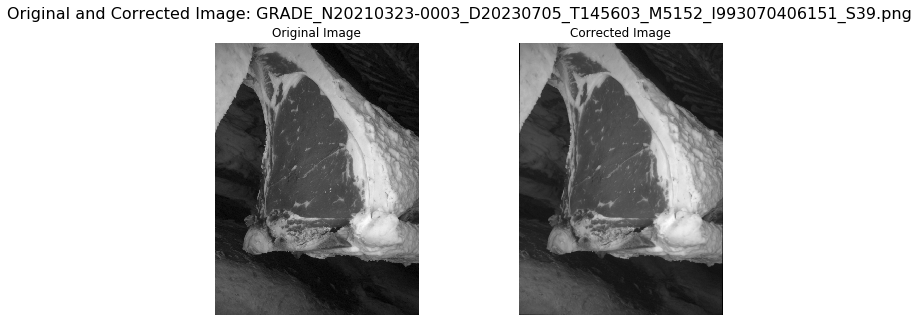

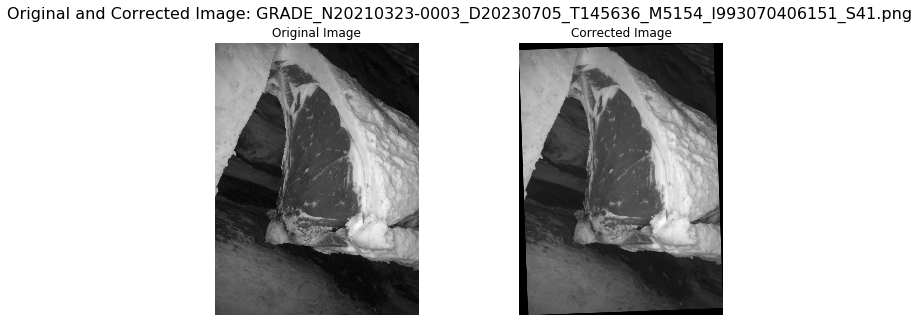

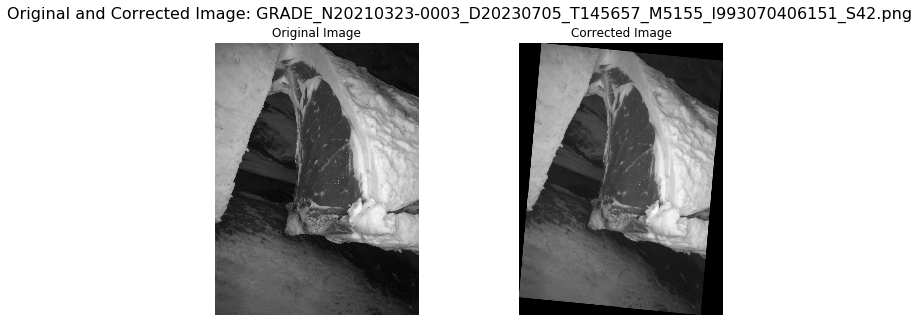

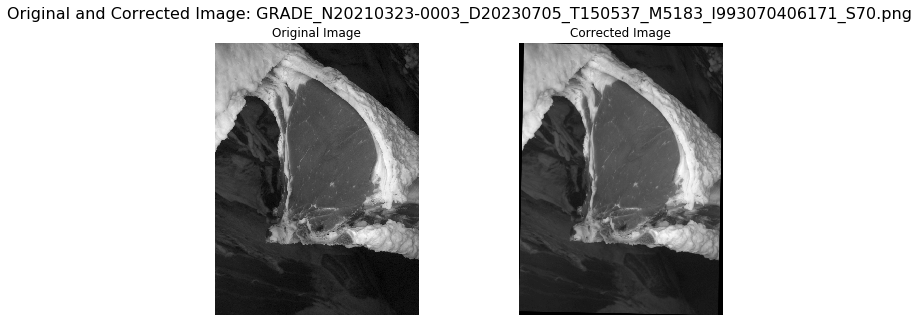

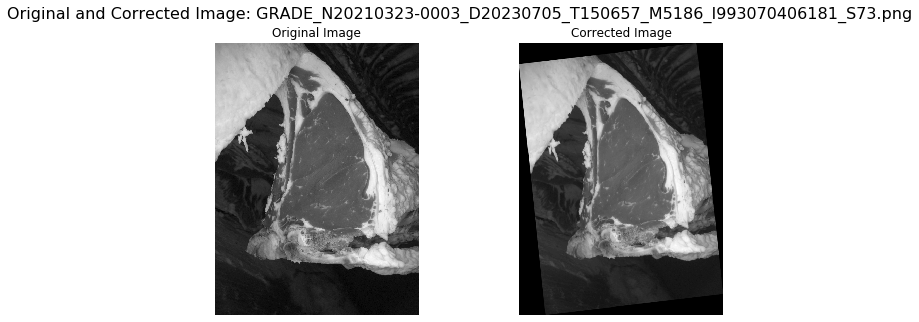

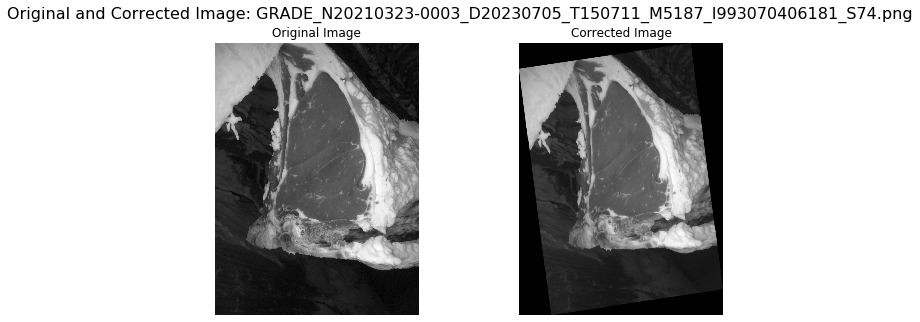

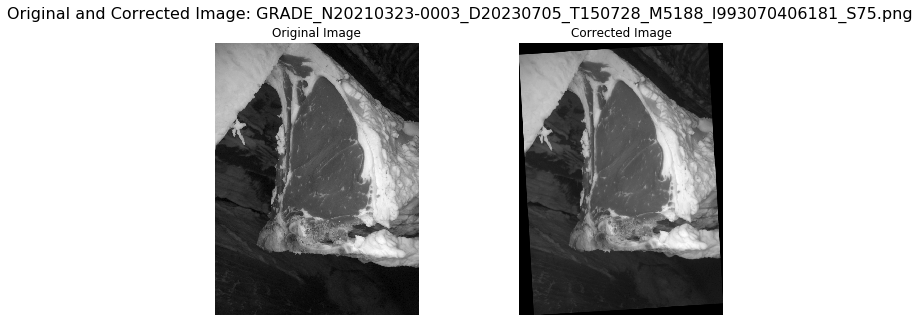

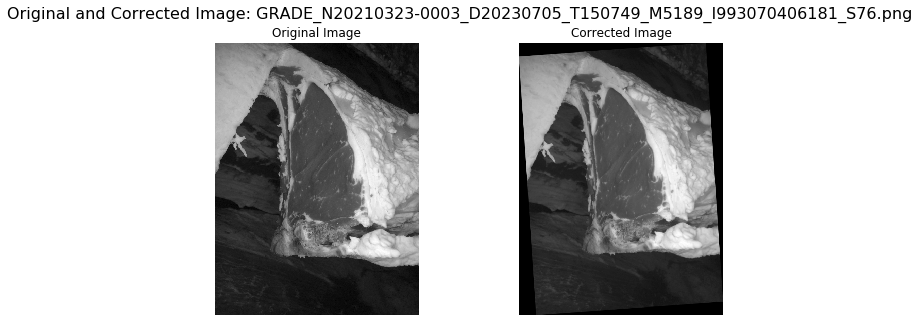

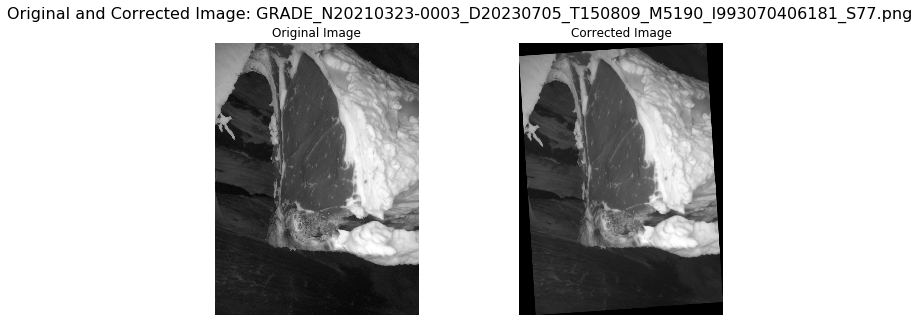

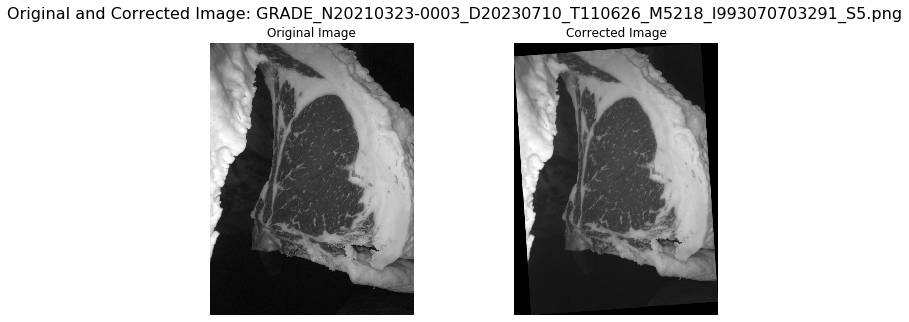

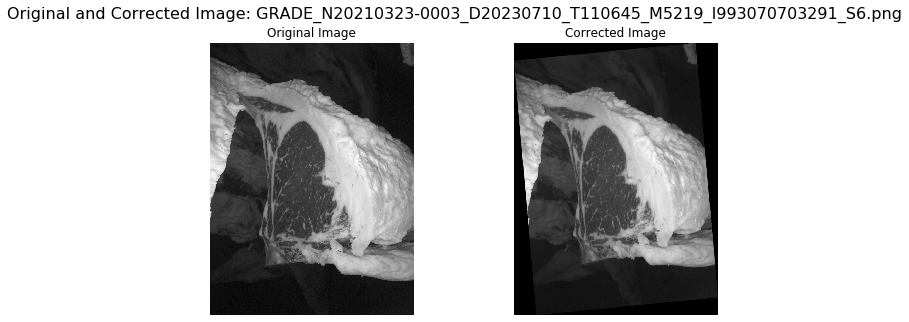

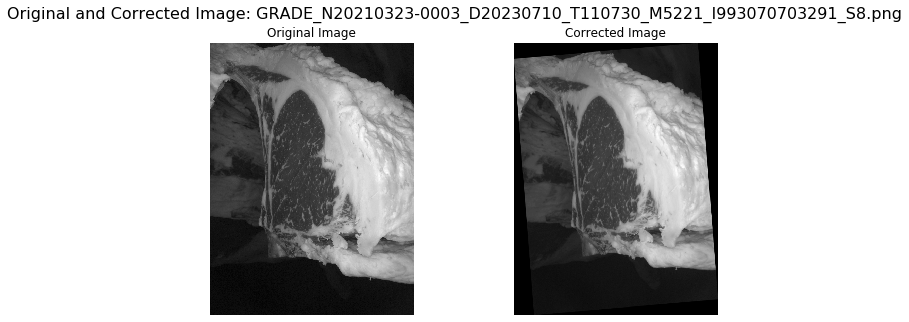

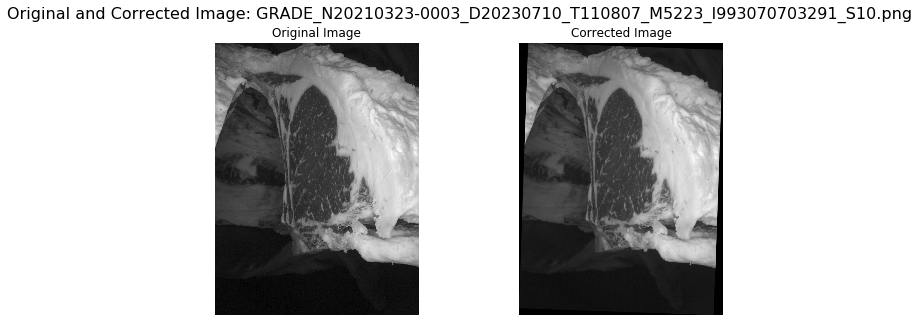

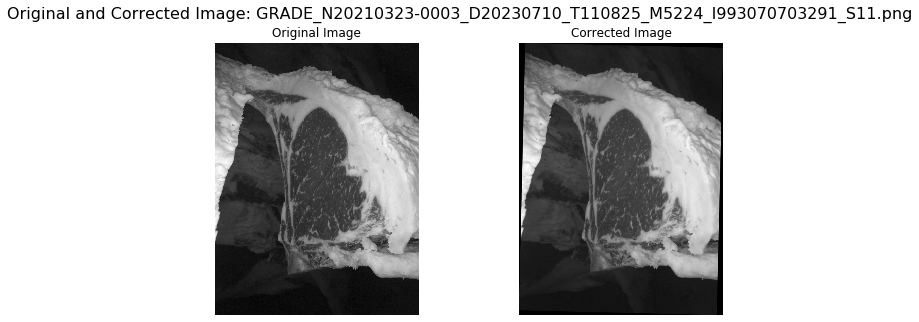

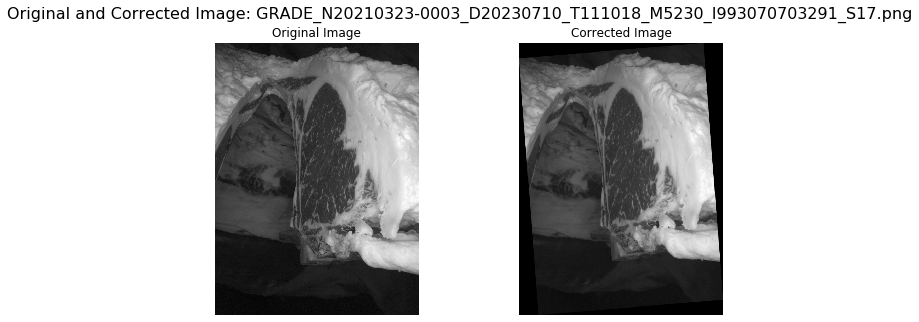

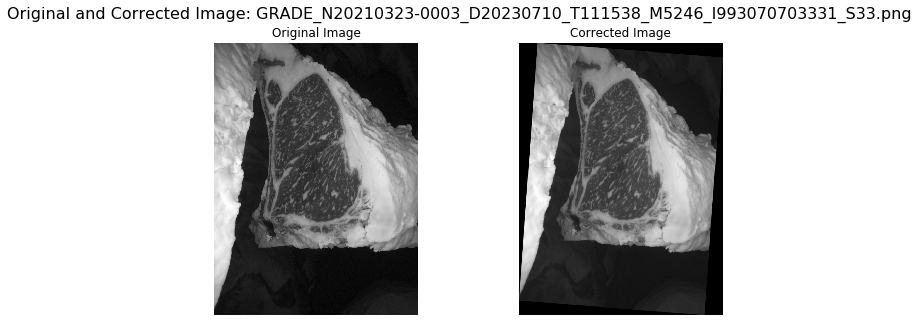

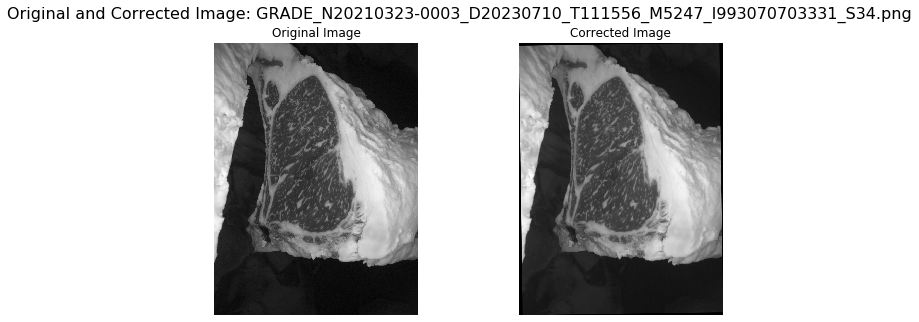

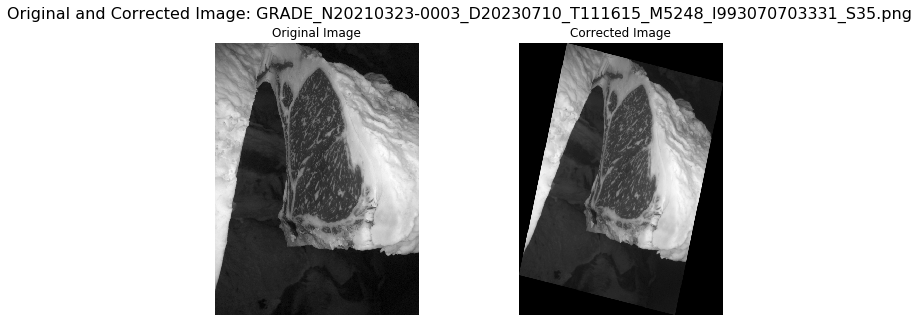

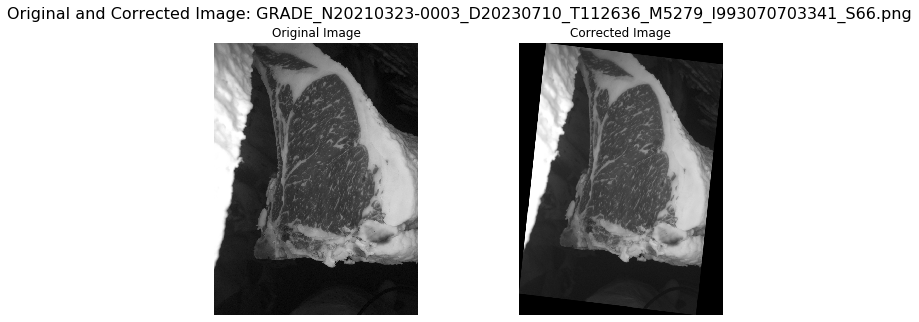

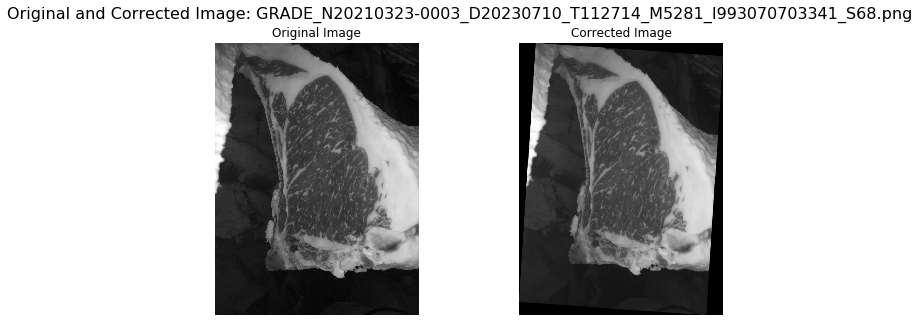

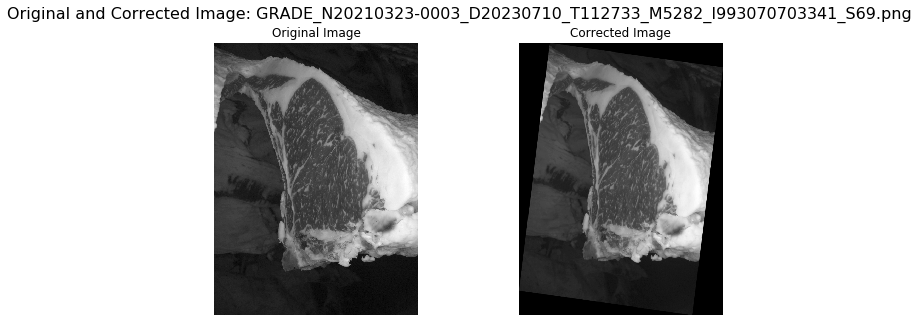

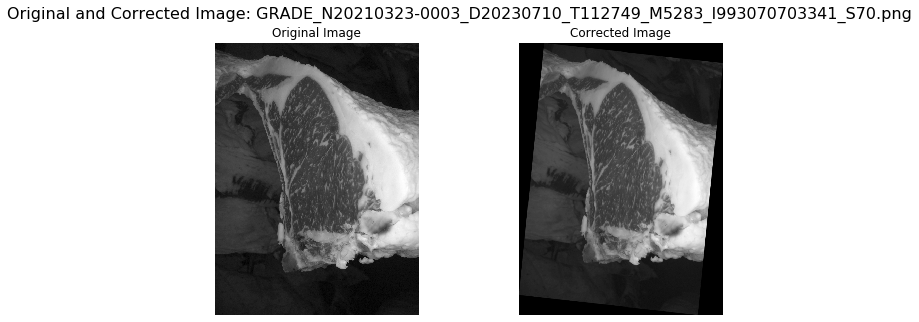

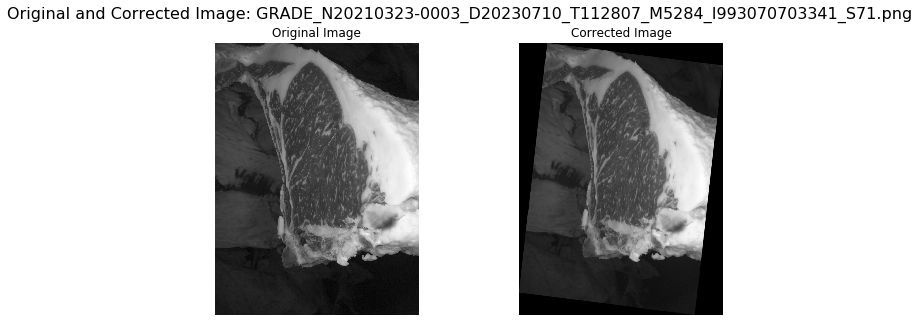

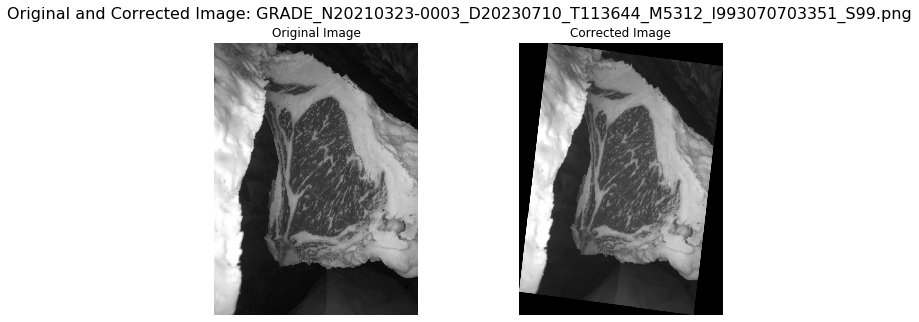

In [17]:
# 加载数据
images, angles, origin_images = load_and_pair_data(image_dir, csv_path, target_size=(96, 128))

# 将数据格式化为float32
images = images.astype('float32')

# 对所有图片进行预测
y_pred = model.predict(images)

# 输出保存旋转后的图片的路径
output_dir = r"C:\Users\xuyan\RotNet\data\RotationAngle\DATASET\STANDARDIZED\images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 获取图片文件名列表（假设load_and_pair_data返回了原始文件名）
image_filenames = sorted(os.listdir(image_dir))

# 处理图片，旋转校正所有图片并保存
for idx, (image, pred_angle, filename) in enumerate(zip(origin_images, y_pred.flatten(), image_filenames)):
    # 获取图像的原始文件路径，用于保存
    output_path = os.path.join(output_dir, filename)
    
    # 旋转角度为负的预测值
    corrected_angle = -pred_angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # 计算旋转矩阵
    rotation_matrix = cv2.getRotationMatrix2D(center, corrected_angle, 1.0)
    
    # 扩展图像边界，以防旋转时图像内容被裁剪
    cos = np.abs(rotation_matrix[0, 0])
    sin = np.abs(rotation_matrix[0, 1])
    
    # 计算新的边界尺寸，保证旋转后图像不会被裁剪
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # 调整旋转矩阵以考虑平移
    rotation_matrix[0, 2] += (new_w / 2) - center[0]
    rotation_matrix[1, 2] += (new_h / 2) - center[1]

    # 对图像进行仿射变换，并调整边界
    expanded_image = cv2.warpAffine(image, rotation_matrix, (new_w, new_h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    # 将图像裁剪或调整回原始尺寸，以确保最终输出图像和原始输入尺寸一致
    corrected_image = cv2.resize(expanded_image, (w, h), interpolation=cv2.INTER_AREA)
    
    # 保存旋转后的图片，保持原来的文件名
    cv2.imwrite(output_path, corrected_image)

# 显示前十张图片作为参考
for i in range(50):
    # 加载原始图片
    original_image_path = os.path.join(image_dir, image_filenames[i])
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    
    # 加载保存的校正图片
    corrected_image_path = os.path.join(output_dir, image_filenames[i])
    corrected_image = cv2.imread(corrected_image_path, cv2.IMREAD_GRAYSCALE)
    
    # 创建两个子图，显示原图和校正后的图像
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Original and Corrected Image: {image_filenames[i]}", fontsize=16)

    # 显示原图
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # 显示校正后的图
    axes[1].imshow(corrected_image, cmap='gray')
    axes[1].set_title("Corrected Image")
    axes[1].axis('off')

    # 显示图像
    plt.show()